# Reptile

In [80]:
# %pip install tensorflow

## Importing Libraries

In [81]:
# import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [82]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow info messages


## Loading Data

In [83]:
df = pd.read_csv('../22_HP/outputs/simulation_results_not.csv')

In [84]:
df = df.drop(columns = ['delay_LH_NodeA', 'delay_HL_NodeA'], axis=1)

In [85]:
df

,Vin,temp,pvdd,cqload,lmin,wmin,toxe_n,toxm_n,toxref_n,toxe_p,toxm_p,toxref_p,toxp_par,xj_n,xj_p,ndep_n,ndep_p,leakage
0,0.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,5.986455e-09
1,1.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,6.874093e-09
2,0.0,73.734086,0.936041,1.703362e-15,4.468047e-08,4.295989e-08,8.966653e-10,9.579161e-10,8.894931e-10,9.051161e-10,8.974949e-10,9.112459e-10,6.536598e-10,1.335243e-08,1.435760e-08,6.696820e+18,2.698271e+18,5.237383e-09
3,1.0,73.734086,0.936041,1.703362e-15,4.468047e-08,4.295989e-08,8.966653e-10,9.579161e-10,8.894931e-10,9.051161e-10,8.974949e-10,9.112459e-10,6.536598e-10,1.335243e-08,1.435760e-08,6.696820e+18,2.698271e+18,2.260783e-09
4,0.0,53.497408,0.977805,2.900497e-15,4.542734e-08,4.700461e-08,8.951004e-10,9.207174e-10,8.560222e-10,9.582987e-10,9.510320e-10,9.448349e-10,6.471342e-10,1.439416e-08,1.428137e-08,6.482726e+18,2.732484e+18,3.193491e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.0,81.517314,0.989291,1.079963e-15,4.737492e-08,4.576390e-08,9.024798e-10,8.716992e-10,8.717394e-10,9.042821e-10,9.679145e-10,8.903566e-10,6.401357e-10,1.417753e-08,1.408925e-08,6.055804e+18,2.983100e+18,4.747108e-09
19996,0.0,-50.718263,0.972025,2.675348e-15,4.308545e-08,4.571994e-08,9.087048e-10,8.717162e-10,9.293734e-10,9.071626e-10,8.870402e-10,8.568218e-10,6.378137e-10,1.345592e-08,1.464451e-08,6.590675e+18,2.836970e+18,3.449923e-09
19997,1.0,-50.718263,0.972025,2.675348e-15,4.308545e-08,4.571994e-08,9.087048e-10,8.717162e-10,9.293734e-10,9.071626e-10,8.870402e-10,8.568218e-10,6.378137e-10,1.345592e-08,1.464451e-08,6.590675e+18,2.836970e+18,1.367183e-09
19998,0.0,91.443514,1.025177,3.572204e-15,4.552864e-08,4.697390e-08,9.045228e-10,8.774425e-10,8.855997e-10,9.384903e-10,9.221000e-10,9.031884e-10,6.682387e-10,1.456677e-08,1.477978e-08,6.233399e+18,2.980221e+18,7.537069e-09


In [86]:
# Normalize data
scaler = StandardScaler()

In [87]:
x = df.drop('leakage', axis=1)
x.shape

(20000, 17)

In [88]:
x = scaler.fit_transform(x.values)
print(x[0])

[-1.          0.18078805  0.86864689 -1.61154477 -0.5423984  -1.1100848
 -0.48642597  0.5056319  -0.67856217  0.59256723 -0.1722708   1.26269638
 -0.46089947  0.84367392  0.72033654  0.14908407 -0.5150728 ]


In [89]:
y = pd.DataFrame(df['leakage'])
y = scaler.fit_transform(y.values.reshape(-1, 1) )
y.shape

(20000, 1)

In [90]:
print(y[0])

[-0.09899045]


First, let's reset the tensorflow graph,

In [91]:
tf.compat.v1.reset_default_graph()

Initialize network parameters,

In [92]:
num_hidden = 100

In [93]:
num_classes = 1
num_feature = x.shape[1]

Next, we define the placeholders for our input and output,

In [94]:
X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

Randomly initialize our model parameters, 

In [95]:
w1 = tf.Variable(tf.random_uniform([num_feature, num_hidden]))
b1 = tf.Variable(tf.random_uniform([num_hidden]))

w2 = tf.Variable(tf.random_uniform([num_hidden, num_classes]))
b2 = tf.Variable(tf.random_uniform([num_classes]))

Perform feedforward operation to predict the output Yhat

In [96]:
#layer 1
z1 = tf.matmul(X, w1) + b1
a1 = tf.nn.tanh(z1)

#output layer
z2 = tf.matmul(a1, w2) + b2
Yhat = z2 

We use mean squared error as our loss function

In [97]:
loss_function = tf.reduce_mean(tf.square(Yhat - Y))

Minimize the loss using Adam Optimizer

In [98]:
optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

Initialize tensorflow variables,

In [99]:
init = tf.global_variables_initializer()

### Single Hidden Layer

In [100]:
#number of epochs i.e training iterations
num_epochs = 50


#number of samples i.e number of shots
num_samples = 100 

#number of tasks
num_tasks = 5

#number of times we want to perform optimization
num_iterations = 10


#mini btach size
mini_batch = 20

In [101]:
losses = []
r2_scores = []

with tf.Session() as sess:
    sess.run(init)
    
    for e in range(num_epochs+1):
        for _ in range(num_tasks+1):

            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]

            # Randomly initialize weights (w) for each task
            w1 = tf.Variable(tf.random_uniform([num_feature, num_hidden]))
            b1 = tf.Variable(tf.random_uniform([num_hidden]))

            w2 = tf.Variable(tf.random_uniform([num_hidden, num_classes]))
            b2 = tf.Variable(tf.random_uniform([num_classes]))
            
            sess.run(tf.variables_initializer([w1, b1, w2, b2]))

            for _ in range(num_iterations):
                for i in range(0, num_samples, mini_batch):
                    x_minibatch = x_sample_task[i:i+mini_batch]
                    y_minibatch = y_sample_task[i:i+mini_batch]
                    sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})
            
            # Get the updated weights after SGD on the task
            old_w1, old_b1, old_w2, old_b2 = sess.run([w1, b1, w2, b2])

            # Perform meta update
            epsilon = 0.1
            updated_w1 = old_w1 + epsilon * (w1 - old_w1)
            updated_b1 = old_b1 + epsilon * (b1 - old_b1)
            updated_w2 = old_w2 + epsilon * (w2 - old_w2)
            updated_b2 = old_b2 + epsilon * (b2 - old_b2)

            # Update the model parameters with new parameters
            sess.run([w1.assign(updated_w1), b1.assign(updated_b1),
                      w2.assign(updated_w2), b2.assign(updated_b2)])
        
        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)
            
        # Calculate R2 score
        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        r2_scores.append(r2)
        
        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}\n".format(e, loss, r2))
            print('---------------------------------\n')

Epoch 0: Loss 0.41875556111335754, R2 Score 0.4325443018539237

---------------------------------

Epoch 10: Loss 0.010452327318489552, R2 Score 0.9914238201514012

---------------------------------

Epoch 20: Loss 0.0011798469349741936, R2 Score 0.9987533302324691

---------------------------------

Epoch 30: Loss 0.02870677225291729, R2 Score 0.9795232463378727

---------------------------------

Epoch 40: Loss 0.0016051646089181304, R2 Score 0.9984432658838474

---------------------------------



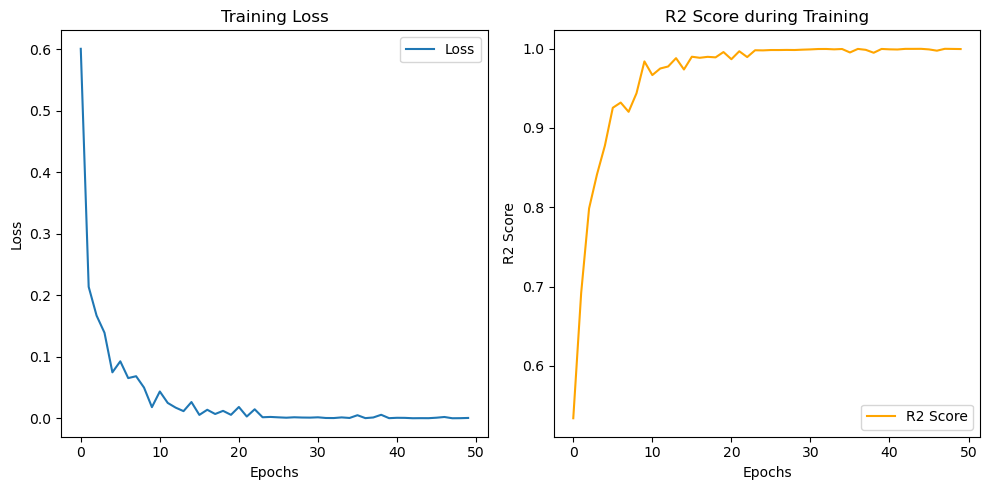

In [ ]:
# Plot the training loop
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), r2_scores, label='R2 Score', color='orange')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score during Training')
plt.legend()

plt.tight_layout()
plt.show()

### 3 Hidden Layers

In [ ]:
# Initialize network parameters
num_hidden_layers = 2
num_hidden_units = 10
num_classes = 1
num_feature = x.shape[1]

# Reset the tensorflow graph
tf.compat.v1.reset_default_graph()

# Define placeholders for input and output
X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

# Initialize model parameters for each layer
weights = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
                                         num_hidden_units if i < num_hidden_layers else num_classes]))
           for i in range(num_hidden_layers + 1)]
biases = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
          for i in range(num_hidden_layers + 1)]

# Perform feedforward operations for each layer
layer_outputs = [X]
for i in range(num_hidden_layers + 1):
    layer_input = layer_outputs[-1]
    layer_output = tf.matmul(layer_input, weights[i]) + biases[i]
    layer_output = tf.nn.tanh(layer_output) if i < num_hidden_layers else layer_output
    layer_outputs.append(layer_output)

# Output of the neural network
Yhat = layer_outputs[-1]

# Loss function and optimizer
loss_function = tf.reduce_mean(tf.square(Yhat - Y))
optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

# Initialize tensorflow variables
init = tf.global_variables_initializer()

# Training parameters
num_epochs = 50
num_samples = 100
num_tasks = 5
num_iterations = 10
mini_batch = 20
epsilon = 0.1  # Reptile update factor

In [ ]:
# Initialize empty lists to store loss and R2 scores
losses = []
r2_scores = []
# Initialize phi (meta-parameters)
phi_init = None

# Training loop
with tf.Session() as sess:
    sess.run(init)
    
    for e in range(num_epochs+1):
        for _ in range(num_tasks+1):  # Iterate over a new set of tasks in each epoch
            # Sample a new task batch (τ1, τ2, ..., τn)
            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]
            
            # Randomly initialize weights (w) for each task
            weights_task = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
                                                           num_hidden_units if i < num_hidden_layers else num_classes]))
                            for i in range(num_hidden_layers + 1)]
            biases_task = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
                           for i in range(num_hidden_layers + 1)]
            sess.run(tf.variables_initializer(weights_task + biases_task))
            
            # Inner loop for gradient updates on tasks
            for k in range(num_iterations):
                for i in range(0, num_samples, mini_batch):
                    x_minibatch = x_sample_task[i:i+mini_batch]
                    y_minibatch = y_sample_task[i:i+mini_batch]
                    sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})
            
            # Get the updated weights (w) after SGD on the task
            w_updated = sess.run(weights_task + biases_task)
            
            # Update phi using Reptile update rule
            if phi_init is None:
                phi_init = w_updated  # Initialize phi on the first iteration
            else:
                for i in range(len(phi_init)):
                    phi_init[i] += epsilon * (w_updated[i] - phi_init[i])

        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)
        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        r2_scores.append(r2)
        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}\n".format(e, loss, r2))
            print('---------------------------------\n')


Epoch 0: Loss 0.34949448704719543, R2 Score 0.3791835027512742

---------------------------------



KeyboardInterrupt: 

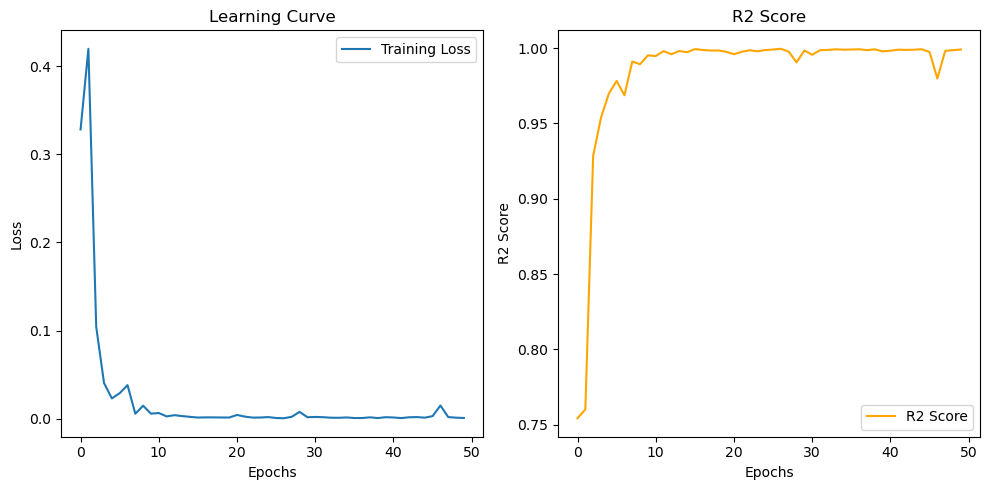

In [ ]:
# Plotting the learning curve and R2 scores
plt.figure(figsize=(10, 5))

# Learning Curve
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()

# R2 Scores
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), r2_scores, label='R2 Score', color='orange')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score')
plt.legend()

plt.tight_layout()
plt.show()